In [1]:
import numpy as np
import matplotlib.pyplot as plt

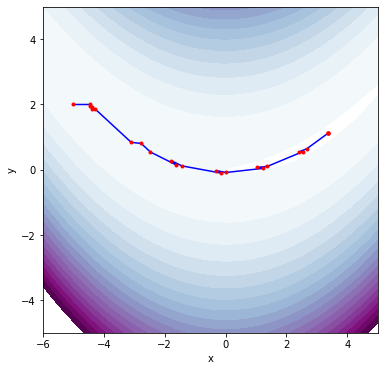

minimum point is (3.369,1.113)
iteration 8


In [2]:

def func(x):
    f = (x[0]**2-10*x[1])**2 + 2*x[1]**2 - 3*x[0]
    return f


def golden2D(x,dr,TOL):
    R, err, loop = 0.61803399, 10., -1
    a = x - dr # initialize the range
    b = x + dr
    while(err > TOL):
        loop += 1
        x1 = b - R*(b - a)
        x2 = a + R*(b - a)
        f1=func(x1)
        f2=func(x2)
        if(f2 > f1):
            b = x2  
        else:
            a = x1
        err = sum((a - b)**2)
        err = np.sqrt(err)
        xmin = a
    return xmin


x0 = np.array([-5,2])
error = 1
TOL = 10**-6

x = [x0]

d0 = np.array([1, 0])
d1 = np.array([0, 1])
i=0

while error > TOL:
    dr = d0
    x1 = golden2D(x0, dr, TOL)
    x.append(x1)
    
    dr = d1
    x2 = golden2D(x1, dr, TOL)
    x.append(x2)
    
    d0 = d1
    d1 = (x2 - x0)/np.sum((x2 - x0)**2)
    
    dr = d1
    x3 = golden2D(x2, dr, TOL)
    
    x.append(x3)
    x0 = x3
    
    error = np.sum((x3 - x2)**2)
    i=i+1

#===============================================================

fig = plt.figure(figsize=(6,6))


x = np.array(x)
xt = x[:, 0]
yt = x[:, 1]
plt.plot(x[:, 0], x[:, 1], color = 'blue')
plt.plot(x[:, 0], x[:, 1], '.', color = 'red')


# plt.scatter(x[:, 0], x[:, 1], color='red',edgecolors='k',s = 50)

#========================= background =================================


x = np.linspace(-6, 5, 1000)
y = np.linspace(-5, 5, 1000)

X, Y = np.meshgrid(x, y)
E = ((X**2-10*Y)**2 + 2*Y**2 - 3*X)


dmax = np.max(E)
dmin = np.min(E)

levels = 6000*np.arange(20)/22  # (dmax-dmin)*np.arange(6000)/2900 +dmin
cmap = plt.cm.BuPu
con = plt.contourf(x, y, E, levels,cmap = cmap) 
plt.xlabel('x')
plt.ylabel('y')
plt.show()


#=======================================

print("minimum point is ({:.3f},{:.3f})".format(xt[-1], yt[-1]))
print("iteration {}".format(i))